In [39]:
import re 
import csv


In [40]:
with open("pubmed-agrobacter-set (1).txt", encoding="utf8") as f1:
    text=f1.read()

In [41]:
# creo una exprecion regular para adaptar el archivo 
# eliminar los saltos de linea 
#re.sub sustituye por expreciones regulares 
text = re.sub(r'\n\s{6}', ' ', text)

In [42]:
# busca y guarda los codigos postales en una lista 
# esta buscando  el siguiente patron de texto y LL 00000, USA
# y guardando serie de 5 numeros 
codigosp = re.findall(r' [A-Z]{2}\s(\d{5}), ', text)

In [43]:
# elimno los codigos postales duplicados 
codigosu = list(set(codigosp))

In [44]:
codigosu.sort()

In [45]:
len(codigosu)

226

In [46]:
len(codigosp)

967

In [47]:
# generando diccionadio con codigo postal latitud y longitud 
diccoordenadas = {}
with open("cordenadas.csv") as f1:
    csvr = csv.DictReader(f1)
    for row in csvr:
        diccoordenadas[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]


In [48]:
# creamos listas para informacion para poder graficar 
codep = []
long = []
lat = []
contador = []# contener cuantas veces ha publicado un pais 

In [49]:
# va a repetir un proceso por cada codigo postal 
for codigo in codigosu: 
    # if we can find the coordinates
    if codigo in diccoordenadas:
        codep.append(codigo)
        lat.append(diccoordenadas[codigo][0])
        long.append(diccoordenadas[codigo][1])
        contador.append(codigosp.count(codigo))

In [50]:
codep

['00794',
 '01003',
 '01267',
 '02114',
 '02118',
 '02135',
 '02138',
 '02139',
 '02142',
 '02892',
 '02912',
 '03824',
 '06269',
 '06355',
 '07065',
 '08854',
 '08901',
 '10021',
 '10065',
 '10461',
 '10468',
 '11724',
 '11794',
 '13210',
 '13502',
 '14220',
 '14456',
 '14623',
 '14850',
 '14853',
 '15213',
 '16802',
 '17307',
 '19104',
 '19107',
 '19122',
 '19610',
 '19711',
 '20032',
 '20705',
 '20742',
 '20815',
 '20817',
 '20850',
 '20899',
 '21201',
 '21202',
 '21205',
 '21251',
 '21702',
 '24060',
 '24540',
 '27709',
 '27834',
 '27858',
 '29208',
 '29472',
 '29634',
 '30303',
 '30313',
 '30322',
 '30602',
 '31030',
 '32403',
 '33101',
 '33136',
 '33158',
 '33431',
 '33598',
 '33850',
 '34945',
 '36088',
 '36849',
 '37208',
 '37209',
 '39762',
 '40220',
 '40506',
 '42101',
 '43210',
 '43606',
 '44234',
 '44691',
 '45056',
 '45701',
 '46268',
 '46556',
 '47405',
 '47907',
 '48109',
 '48823',
 '49931',
 '50011',
 '50131',
 '52242',
 '53562',
 '53706',
 '54830',
 '55108',
 '55455',


In [51]:
contador

[5,
 2,
 1,
 8,
 5,
 1,
 1,
 8,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 1,
 5,
 1,
 1,
 3,
 6,
 1,
 1,
 18,
 2,
 3,
 49,
 1,
 14,
 2,
 11,
 2,
 1,
 2,
 2,
 1,
 15,
 3,
 1,
 2,
 3,
 1,
 7,
 1,
 5,
 3,
 1,
 1,
 2,
 2,
 1,
 3,
 5,
 1,
 1,
 2,
 1,
 7,
 10,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 7,
 1,
 1,
 4,
 1,
 7,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 15,
 1,
 2,
 17,
 2,
 29,
 9,
 5,
 1,
 2,
 5,
 3,
 2,
 1,
 11,
 5,
 18,
 11,
 1,
 19,
 1,
 5,
 1,
 2,
 4,
 1,
 2,
 5,
 1,
 1,
 3,
 9,
 2,
 4,
 4,
 1,
 20,
 2,
 1,
 19,
 1,
 3,
 2,
 2,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 3,
 10,
 1,
 5,
 1,
 1,
 1,
 8,
 7,
 2,
 1,
 1,
 1,
 1,
 2,
 5,
 4,
 1,
 6,
 21,
 50,
 1,
 9,
 4,
 1,
 1,
 6,
 8,
 2,
 2,
 6,
 3]

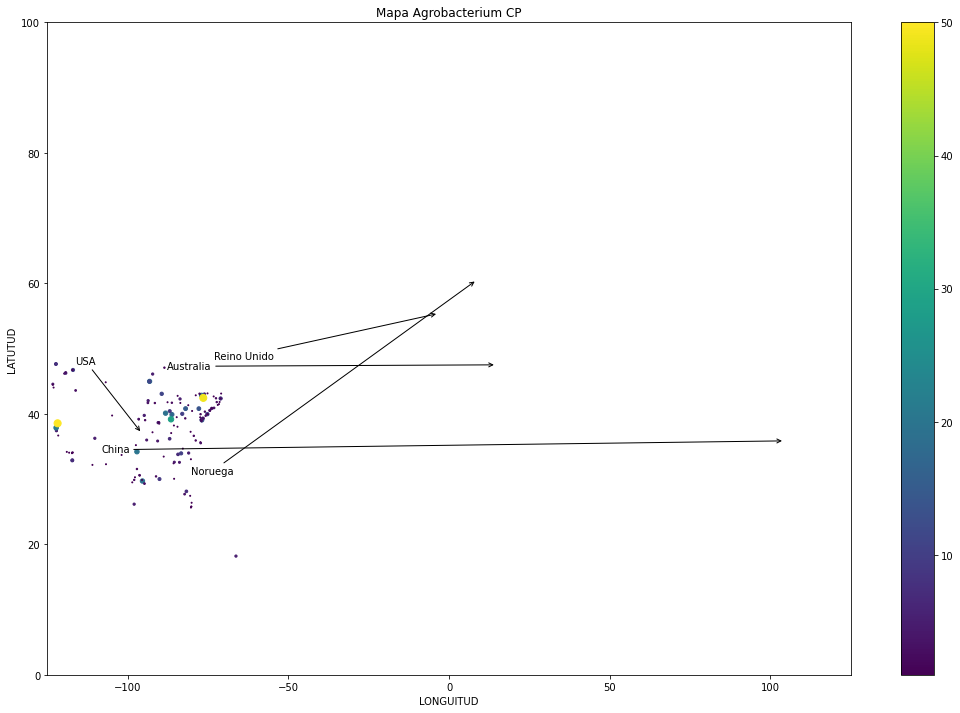

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(long, lat, s = contador, c=contador)
plt.colorbar()
# only continental us without Alaska

plt.xlim(-125,125)
plt.ylim(0, 100)
ard = dict(arrowstyle="->")

plt.annotate('China', xy = (104.195397,35.86166), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Brazil', xy = (-51.192528,-14.235004), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Reino Unido', xy = (-3.435973, 55.378051), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Australia', xy = (14.550072, 47.516231), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Noruega', xy = (8.4689461, 60.472024), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.xlabel("LONGUITUD")
plt.ylabel("LATUTUD")
plt.title("Mapa Agrobacterium CP")
plt.show()